In [8]:
import imp
import mwa_utils
imp.reload(mwa_utils)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
matplotlib.rcParams.update({'font.size': 18})
plt.rc('font', family='Arial')
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

In [10]:
fhdcubesroot = '/Volumes/abraham/xcor_data/fhd_cubes/fhd_apb_EoR0_high_sem1_1/'
fhdlabels = ['1068811656', 'Combined_obs_jd2456615_pointing0_wedge_cut', 'Combined_obs_golden', 'Combined_obs_wedge_cut_plus_res_cut']

In [12]:
mwa_images = []
for i in range(len(fhdlabels)):
    print('loading '+(str(i)))
    freq_averaged_cubedat0,freq_averaged_cubedat1 = mwa_utils.load_freq_averaged_odd_even_cubedat(fhdcubesroot,fhdlabels[i])
    
    mwa_images.append(mwa_utils.MWAImage(freq_averaged_cubedat0,freq_averaged_cubedat1, dtheta_amin=7, n=100))

loading 0


/Users/abrahamn/anaconda2/lib/python2.7/site-packages/scipy/io/idl.py:589: UserWarning: Variable referenced by pointer not found in heap: variable will be set to None
  warnings.warn("Variable referenced by pointer not found "


initializing MWAImage object
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
psf is centered at (x,y) = (49,49)
applying uniform weighting
applying uniform weighting
applying uniform weighting
applying uniform weighting
loading 1
initializing MWAImage object
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
psf is centered at (x,y) = (49,49)
applying uniform weighting
applying uniform weighting
applying uniform weighting
applying uniform weighting
loading 2
initializing MWAImage object
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
gridding healpix
psf is centered at (x,y) = (49,49)
applying uniform weighting
applying uniform weighting
applying uniform weighting
applying uniform weighting
loading 3
initializing MWAImage object
gridding healpix


img.mean() = -0.804068408286
img.mean() = 0.301550435709
img.mean() = 0.00597104176178
img.mean() = -0.000153403276459
img.mean() = -0.32962587445
img.mean() = 0.222972840557
img.mean() = 0.000150843517641
img.mean() = -0.000226687531934
img.mean() = -1.24576339023
img.mean() = -0.535773047579
img.mean() = -0.00052561238443
img.mean() = -0.000218432670798
img.mean() = -0.569648605237
img.mean() = 0.0124115876798
img.mean() = 4.5903337283e-05
img.mean() = -8.83640093375e-05


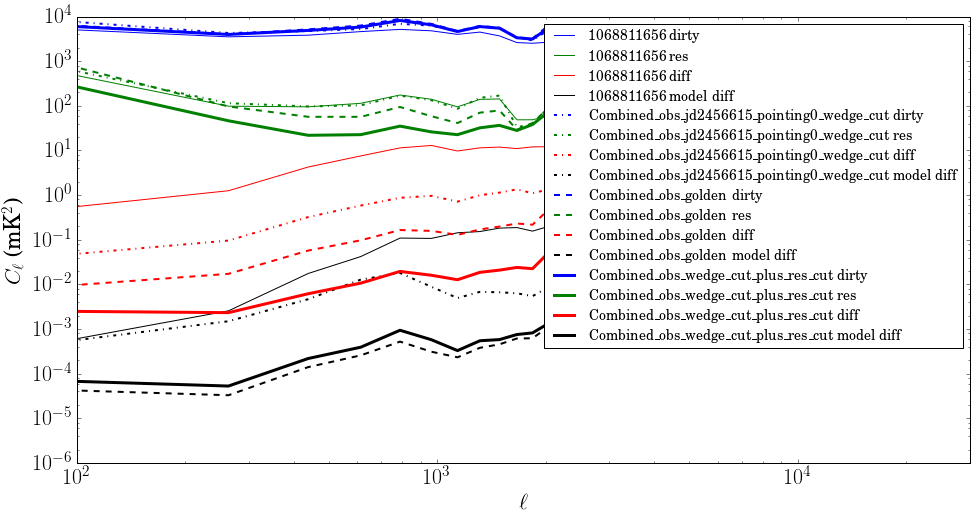

In [28]:
plt.figure(figsize=(16,8))

nbins = 12
lmax = 2100
sty = ['-','-.','--','-']
lw = [1,2,2,3]

for i in range(len(fhdlabels)):
    lbincenters, Cl_dirty0, bin_counts, bin_weights = mwa_utils.img2PS(mwa_images[i].dirty_xx_u0, mwa_images[i].weights_xx0, mwa_images[i].dtheta_rad,nbins,lmax,hann=False)
    lbincenters, Cl_res0, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_images[i].dirty_xx_u0 - mwa_images[i].model_xx_u0, mwa_images[i].weights_xx0,mwa_images[i].dtheta_rad, nbins,lmax, hann=False)
    lbincenters, Cl_dirty_diff, bin_counts, bin_weights =  mwa_utils.img2PS(mwa_images[i].dirty_xx_u0 - mwa_images[i].dirty_xx_u1, mwa_images[i].weights_xx0,mwa_images[i].dtheta_rad, nbins,lmax, hann=False)
    lbincenters, Cl_dirty_model_diff, bin_counts, bin_weights =  mwa_utils.img2PS(mwa_images[i].model_xx_u0 - mwa_images[i].model_xx_u1, .5*(mwa_images[i].weights_xx0+mwa_images[i].weights_xx1),mwa_images[i].dtheta_rad, nbins,lmax, hann=False)
    
    plt.loglog(lbincenters,Cl_dirty0*1.e6,'b'+sty[i],linewidth=lw[i],label=fhdlabels[i].replace('_','\_')+' dirty')
    plt.loglog(lbincenters,Cl_res0*1.e6,'g'+sty[i],linewidth=lw[i],label=fhdlabels[i].replace('_','\_')+' res')
    plt.loglog(lbincenters,Cl_dirty_diff*1.e6,'r'+sty[i],linewidth=lw[i],label=fhdlabels[i].replace('_','\_')+' diff')
    plt.loglog(lbincenters,Cl_dirty_model_diff*1.e6,'k'+sty[i],linewidth=lw[i],label=fhdlabels[i].replace('_','\_')+' model diff')
    

matplotlib.rcParams.update({'font.size': 22})
plt.ylabel(r'$C_\ell$ (mK$^2$)')
plt.xlabel(r'$\ell$')
plt.ylim([1.e-6,1.e4])
#plt.ylim([10,1.e3])
plt.xlim([1.e2,3.e4])
plt.legend(fontsize=14)